ValueError: 'c' argument has 15 elements, which is inconsistent with 'x' and 'y' with size 20.

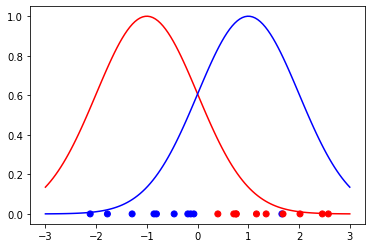

In [88]:
from matplotlib import pyplot as mp
import numpy as np

SIGMA = 1 
mus = [-1, 1]

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

x_values = np.linspace(-3, 3, 120)

points = []

Ns = (10, 10)
N = Ns[0] + Ns[1]

RED = "#FF0000"
BLUE = "#0000FF"

colors = [RED, BLUE]

oracle_color = []

for mno, mu in enumerate(mus):
    mp.plot(x_values, gaussian(x_values, mu, sig=SIGMA), color=colors[mno])
    draw = np.random.normal(mu, SIGMA, Ns[mno])
    points = points + list(draw)
    oracle_color = oracle_color + [mno for o in range(Ns[mno])] 
    
y_axis = [0 for o in range(len(points))]

ys = [1 for i in range(Ns[0])] + [0 for i in range(Ns[1])]

points = np.asarray(points)

# show the oracle colors 
mp.scatter(points, y_axis, c = np.array(oracle_color), cmap=mp.cm.bwr)

# E[X=y1]
expected_values = np.random.rand(N)

# show the guesses colors 
mp.scatter(points, y_axis, c = guesses, cmap=mp.cm.bwr)

mp.show()

In [89]:
# https://stackoverflow.com/questions/12412895/how-to-calculate-probability-in-a-normal-distribution-given-mean-standard-devi
# avoid dependency => scipy.stats import norm

import math

def normpdf(x, mean, sd):
    var = float(sd)**2
    denom = (2*math.pi*var)**.5
    num = math.exp(-(float(x)-float(mean))**2/(2*var))
    return num/denom

def estep(points, theta, expected_values):
    for pointno, point in enumerate(points):
        p1 = normpdf(point, theta["m1"], sd=SIGMA)
        p2 = normpdf(point, theta["m2"], sd=SIGMA)
        expected_values[pointno] = p1/(p1 + p2)
    return expected_values
      
def mstep(expected_values, observations):
    def getMean(expected_values, observations):
        return np.mean(expected_values * observations)

    m1 = getMean(expected_values=expected_values, observations=points)
    m2 = getMean(expected_values=(1 - expected_values), observations=points)

    return {"m1": m1, "m2": m2}

for i in range(10):
    expected_values = estep(points, theta, expected_values)
    theta = mstep(expected_values, observations=points)

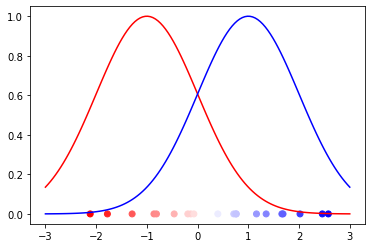

In [91]:
# make a gif
for mno, mu in enumerate(mus):
    mp.plot(x_values, gaussian(x_values, mu, sig=SIGMA), color=colors[mno])

# show the guesses colors 
mp.scatter(points, y_axis, c = expected_values, cmap=mp.cm.bwr)